In [1]:
import numpy as np
import matplotlib.pyplot as plt

from algorithms.NSGA2 import nsga2
import algorithms.NSGA2.evolutionary_operators as nsga2_operators

from algorithms.MOEAD import moead, default_weight_vectors
import algorithms.MOEAD.evolutionary_operators as moead_operators

from algorithms.risk_measures import *

from data_loader import load_stock_quotations

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

# Load data

In [2]:
stock_quotations = load_stock_quotations(stock_names_file='data/NAZWY.txt')

delta_t = 90
stock_returns = stock_quotations.xs('close', level=1, axis=1).pct_change()
last_returns = stock_returns[-delta_t-1:-1]

stock_returns_mean = last_returns.mean() # predicted return for next day

# variance as risk
stock_returns_var = last_returns.var() # risk
stock_returns_cov = last_returns.cov() # covariance matrix

# semi-variance as risk
stock_returns_semi_var = semi_variance(last_returns)
stock_returns_semi_cov = semi_covariance_matrix(np.array(last_returns))

number_of_stocks = stock_returns.shape[1]

In [3]:
number_of_stocks

851

# Objective function

In [4]:
def portfolio_return_value(X):
    return X @ stock_returns_mean


def portfolio_risk_var(X):
    return np.diag(X @ stock_returns_cov @ X.T)


def portfolio_risk_semi_var(X):
    return np.diag(X @ stock_returns_semi_cov @ X.T)


def portfolio_objective_function(risk_function=portfolio_risk_semi_var,
                                 return_function=portfolio_return_value):
    return lambda X: np.c_[risk_function(X), -return_function(X)]

# Test

In [8]:
def show_results(stock_risk, objective_function, moead_kwargs, nsga2_kwargs, print_time=False):
    plt.xlabel('Risk')
    plt.ylabel('Return')

    if print_time:
        plt.title(f"MOEA/D: time: {moead_kwargs['max_time']}s, normalized: {moead_kwargs['normalize']}\n" +
                  f"NSGA-II: time: {nsga2_kwargs['max_time']}s, population size: {nsga2_kwargs['population_size']}")
    else:
        plt.title(f"MOEA/D: iterations: {moead_kwargs['number_of_iterations']}, normalized: {moead_kwargs['normalize']}\n" +
                  f"NSGA-II: iterations: {nsga2_kwargs['number_of_iterations']}, population size: {nsga2_kwargs['population_size']}")

    plt.scatter(stock_risk, stock_returns_mean, c='gray', s=1, label='Basic stocks')

    moead_result = moead(objective_function=objective_function,
                         chromosome_length=number_of_stocks,
                         **moead_kwargs)

    nsga2_result = nsga2(objective_function=objective_function,
                         chromosome_length=number_of_stocks,
                         **nsga2_kwargs)

    pareto_front_moead = objective_function(moead_result)
    pareto_front_nsga2 = objective_function(nsga2_result)

    plt.scatter(pareto_front_moead[:,0], -pareto_front_moead[:,1], c='r', label='MOEA/D')
    plt.scatter(pareto_front_nsga2[:,0], -pareto_front_nsga2[:,1], c='b', s=8, label='NSGA-II')

    plt.legend()
    plt.show()

NSGA-II: 100%|██████████| 200/200 [03:29<00:00,  1.05s/it]


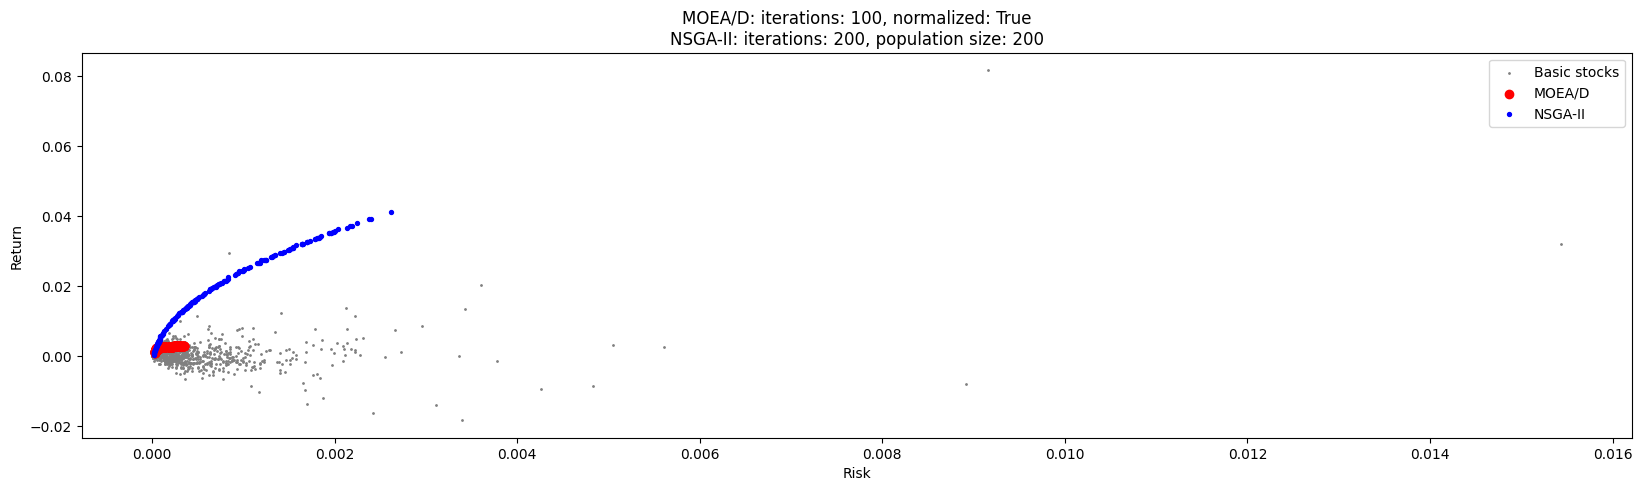

In [6]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 100,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 20,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation},
             nsga2_kwargs={'population_size': 200,
                           'number_of_offspring': 400,
                           'number_of_iterations': 200,
                           'crossover_probability': 0.95,
                           'mutation_probability': 0.25,
                           'crossover_operator': nsga2_operators.differential_crossover(),
                           'mutation_operator': nsga2_operators.swap_mutation,
                           'alpha': 0.75})

NSGA-II: 100%|██████████| 300/300 [02:59<00:00,  1.67it/s]


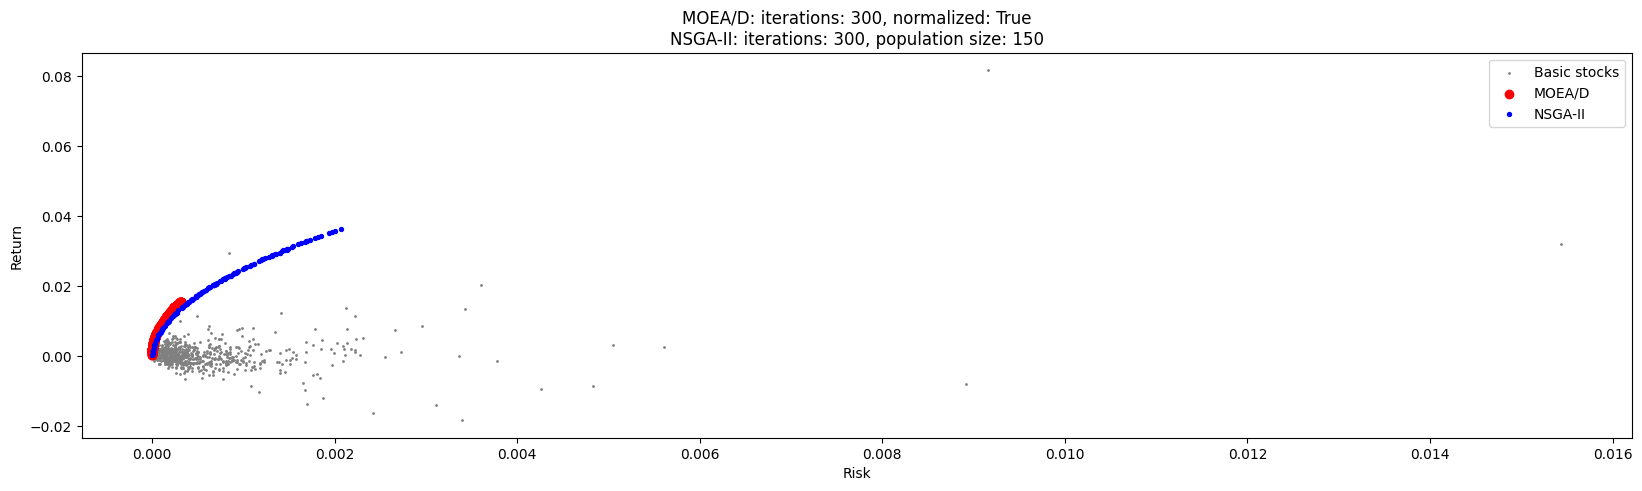

In [8]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 300,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 20,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation},
             nsga2_kwargs={'population_size': 150,
                           'number_of_offspring': 300,
                           'number_of_iterations': 300,
                           'crossover_probability': 0.95,
                           'mutation_probability': 0.25,
                           'crossover_operator': nsga2_operators.differential_crossover(),
                           'mutation_operator': nsga2_operators.swap_mutation,
                           'alpha': 0.75})

NSGA-II: 100%|██████████| 800/800 [30:48<00:00,  2.31s/it]


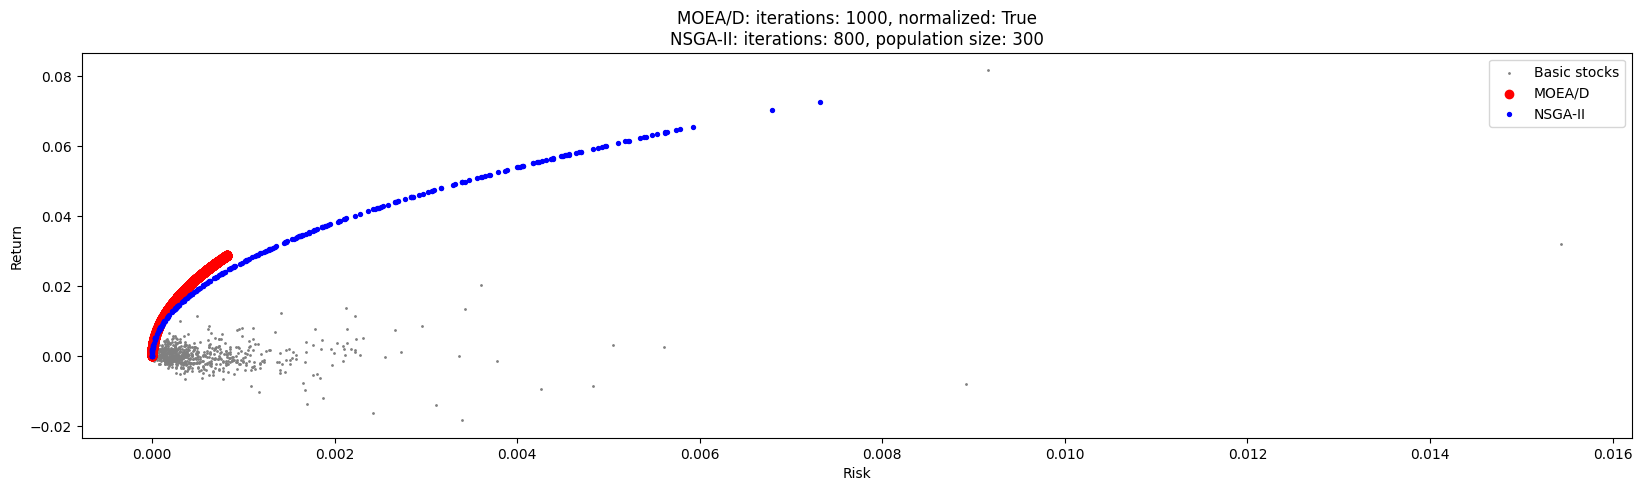

In [10]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 1000,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 20,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation},
             nsga2_kwargs={'population_size': 300,
                           'number_of_offspring': 600,
                           'number_of_iterations': 800,
                           'crossover_probability': 0.95,
                           'mutation_probability': 0.25,
                           'crossover_operator': nsga2_operators.differential_crossover(),
                           'mutation_operator': nsga2_operators.swap_mutation,
                           'alpha': 0.75})

MOEA/D:   7%|▋         | 661/10000 [20:01<4:42:59,  1.82s/it] 


MOEAD: exceeded maximum execution time!


NSGA-II:   2%|▏         | 186/10000 [20:02<17:37:28,  6.47s/it]


NSGA-II: exceeded maximum execution time!


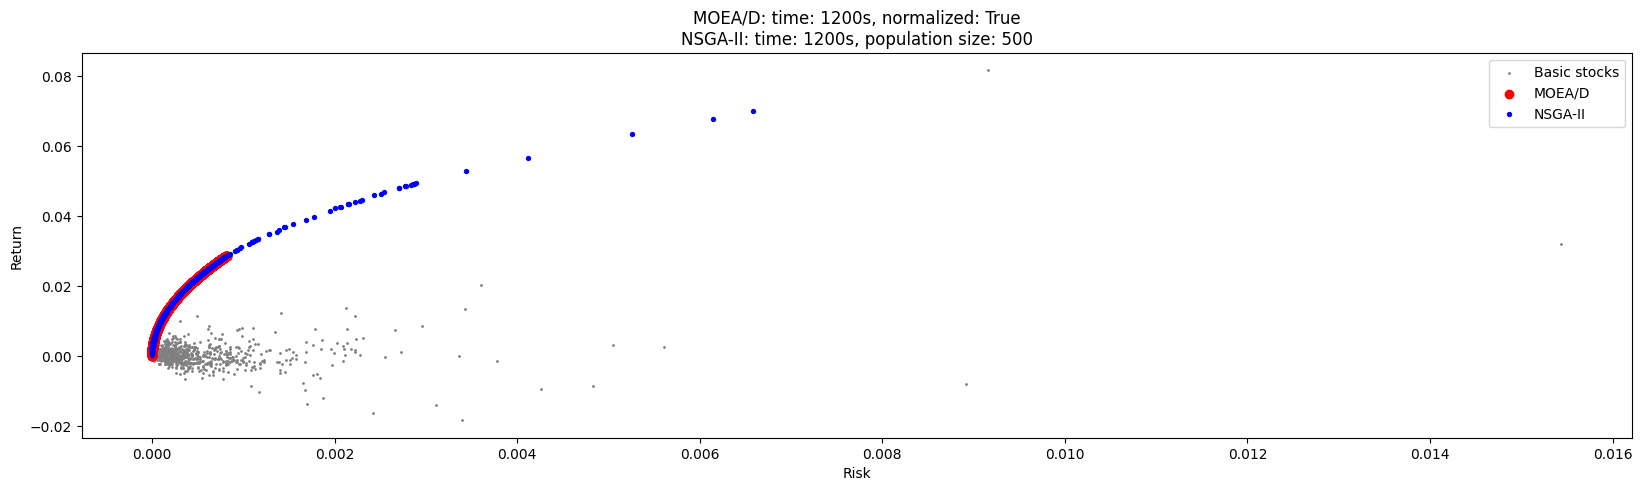

In [11]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 10000,
                           'max_time': 1200,
                           'weight_vectors': default_weight_vectors(120),
                           'neighborhood_size': 20,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation},
             nsga2_kwargs={'population_size': 500,
                           'number_of_offspring': 1000,
                           'number_of_iterations': 10000,
                           'max_time': 1200,
                           'crossover_probability': 0.95,
                           'mutation_probability': 0.25,
                           'crossover_operator': nsga2_operators.differential_crossover(),
                           'mutation_operator': nsga2_operators.swap_mutation,
                           'alpha': 0.75},
             print_time=True)

MOEA/D:   5%|▍         | 493/10000 [06:01<1:56:11,  1.36it/s]


MOEAD: exceeded maximum execution time!


NSGA-II:   6%|▌         | 574/10000 [06:00<1:38:35,  1.59it/s]


NSGA-II: exceeded maximum execution time!


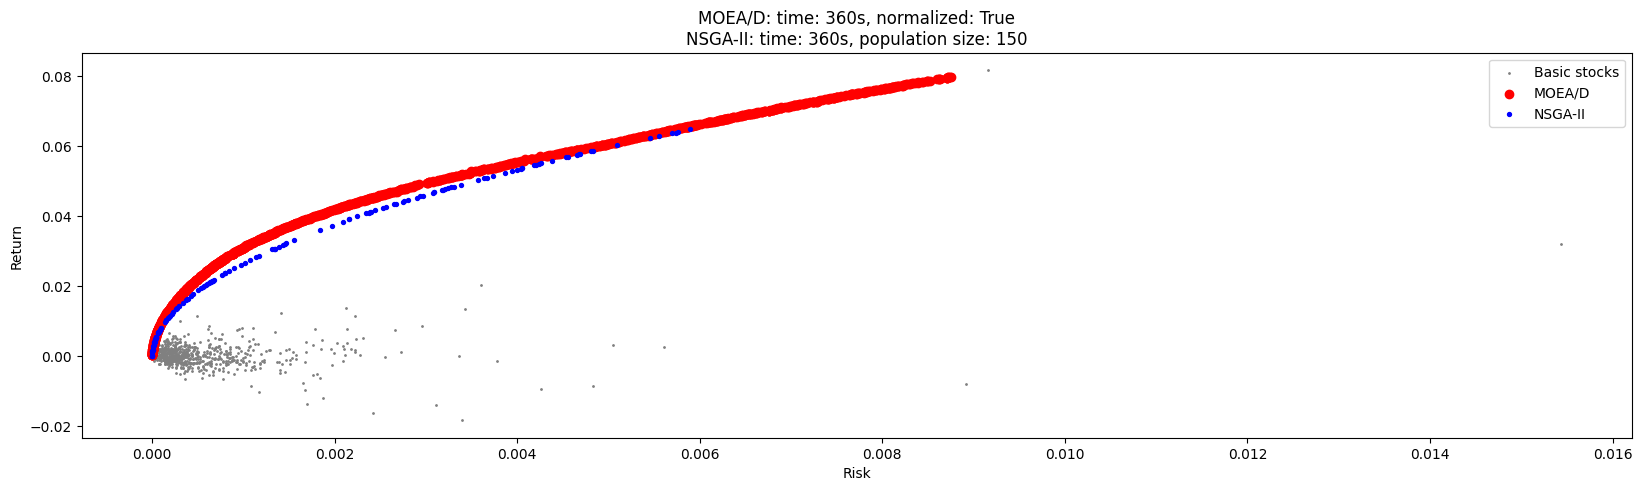

In [13]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 10000,
                           'max_time': 360,
                           'weight_vectors': default_weight_vectors(100),
                           'neighborhood_size': 25,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation},
             nsga2_kwargs={'population_size': 150,
                           'number_of_offspring': 300,
                           'number_of_iterations': 10000,
                           'max_time': 360,
                           'crossover_probability': 0.95,
                           'mutation_probability': 0.25,
                           'crossover_operator': nsga2_operators.differential_crossover(),
                           'mutation_operator': nsga2_operators.swap_mutation,
                           'alpha': 0.75},
             print_time=True)

MOEA/D:   2%|▏         | 238/10000 [06:00<4:06:44,  1.52s/it]


MOEAD: exceeded maximum execution time!


NSGA-II:   5%|▌         | 516/10000 [06:00<1:50:18,  1.43it/s]


NSGA-II: exceeded maximum execution time!


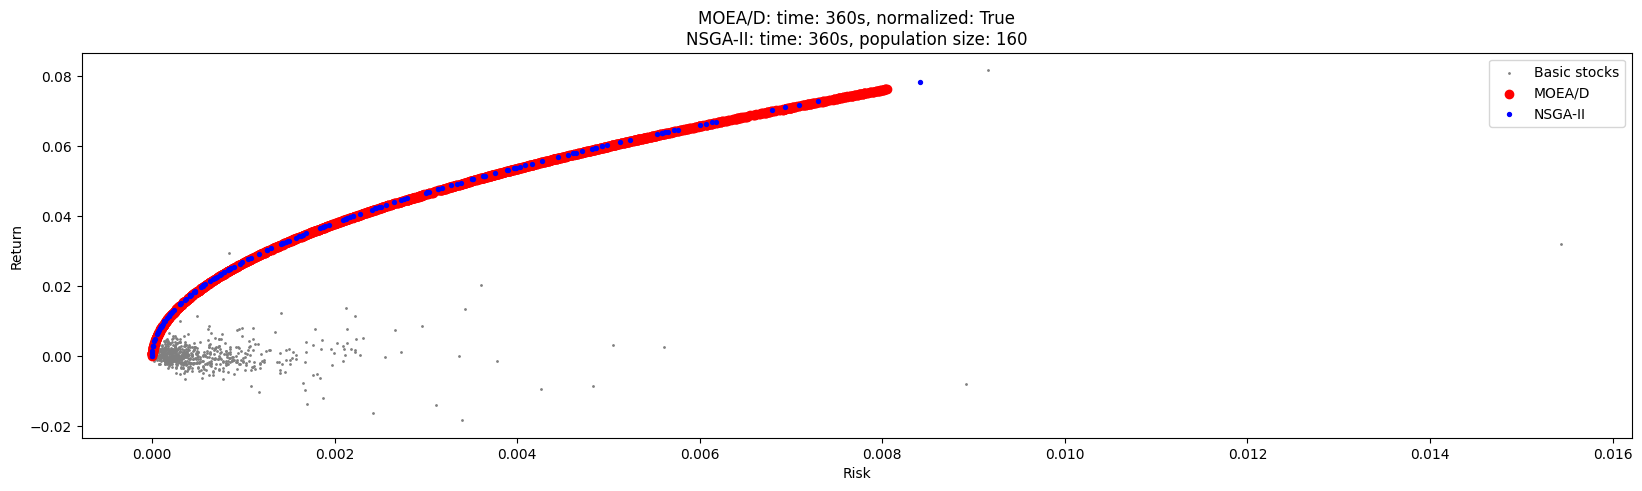

In [14]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 10000,
                           'max_time': 360,
                           'weight_vectors': default_weight_vectors(160),
                           'neighborhood_size': 40,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation},
             nsga2_kwargs={'population_size': 160,
                           'number_of_offspring': 320,
                           'number_of_iterations': 10000,
                           'max_time': 360,
                           'crossover_probability': 0.95,
                           'mutation_probability': 0.25,
                           'crossover_operator': nsga2_operators.differential_crossover(),
                           'mutation_operator': nsga2_operators.swap_mutation,
                           'alpha': 0.75},
             print_time=True)

# Final test

MOEA/D:   8%|▊         | 755/10000 [30:00<6:07:31,  2.39s/it] 


MOEAD: exceeded maximum execution time!


NSGA-II:   8%|▊         | 756/10000 [30:01<6:07:09,  2.38s/it]


NSGA-II: exceeded maximum execution time!


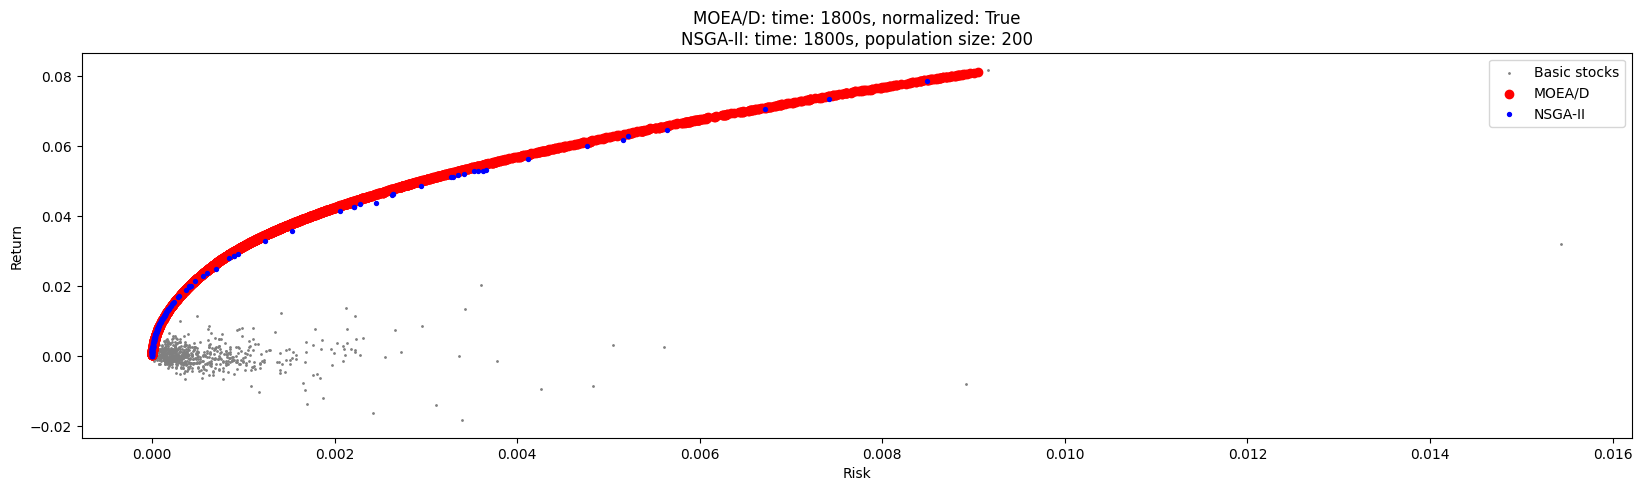

In [16]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             moead_kwargs={'number_of_iterations': 10000,
                           'max_time': 1800,
                           'weight_vectors': default_weight_vectors(100),
                           'neighborhood_size': 25,
                           'mutation_probability': 0.16,
                           'normalize': True,
                           'crossover_operator': moead_operators.differential_crossover,
                           'mutation_operator': moead_operators.change_pair_mutation},
             nsga2_kwargs={'population_size': 200,
                           'number_of_offspring': 400,
                           'number_of_iterations': 10000,
                           'max_time': 1800,
                           'crossover_probability': 0.95,
                           'mutation_probability': 0.25,
                           'crossover_operator': nsga2_operators.differential_crossover(),
                           'mutation_operator': nsga2_operators.swap_mutation,
                           'alpha': 0.75},
             print_time=True)